# Exploring the Human Genome with the SciPy Stack.
An exploration of bioinformatics using the Python SciPy stack guided by the article titled, "[A Comprehensive Introduction to your Genome with the SciPy Stack](https://www.toptal.com/python/comprehensive-introduction-your-genome-scipy)," posted to [Toptal](https://www.toptal.com) and written by [Zhuyi Xue](https://www.toptal.com/resume/zhuyi-xue).

In [6]:
!pwd

/var/genome-scipy.dev/jupyter/jupyter/notebooks


## Download the human genome annotation file in GFF3 format.

In [11]:
!wget --directory-prefix=downloads ftp://ftp.ensembl.org/pub/release-85/gff3/homo_sapiens/Homo_sapiens.GRCh38.85.gff3.gz

--2017-11-12 01:24:28--  ftp://ftp.ensembl.org/pub/release-85/gff3/homo_sapiens/Homo_sapiens.GRCh38.85.gff3.gz
           => ‘downloads/Homo_sapiens.GRCh38.85.gff3.gz’
Resolving ftp.ensembl.org (ftp.ensembl.org)... 193.62.193.8
Connecting to ftp.ensembl.org (ftp.ensembl.org)|193.62.193.8|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /pub/release-85/gff3/homo_sapiens ... done.
==> SIZE Homo_sapiens.GRCh38.85.gff3.gz ... 38469475
==> PASV ... done.    ==> RETR Homo_sapiens.GRCh38.85.gff3.gz ... done.
Length: 38469475 (37M) (unauthoritative)

Homo_sapiens.GRCh38 100%[===================>]  36.69M  6.64MB/s    in 16s     

2017-11-12 01:24:46 (2.23 MB/s) - ‘downloads/Homo_sapiens.GRCh38.85.gff3.gz’ saved [38469475]



## Load GFF3 file into Pandas

In [16]:
import pandas as pd

col_names = ['seqid', 'source', 'type', 'start', 'end', 'score', 'strand', 'phase', 'attributes']

# read into a Pandas DataFrame
# header=None (no header in GFF3 file)
# names=col_names (specify the names for columns)
# sep='\t' (tab delimited GFF3 file)
# comment='#' (ignore lines starting with '#')
# compression='gzip' (gzip-compressed file)    
df = pd.read_csv('downloads/Homo_sapiens.GRCH38.85.gff3.gz', sep='\t', header=None, names=col_names, compression='gzip', comment='#', low_memory=False)

## Look at the first few entries of the GFF3 DataFrame

In [332]:
df.head()

,seqid,source,type,start,end,score,strand,phase,attributes
0,1,GRCh38,chromosome,1,248956422,.,.,.,"ID=chromosome:1;Alias=CM000663.2,chr1,NC_00000..."
1,1,.,biological_region,10469,11240,1.3e+03,.,.,external_name=oe %3D 0.79;logic_name=cpg
2,1,.,biological_region,10650,10657,0.999,+,.,logic_name=eponine
3,1,.,biological_region,10655,10657,0.999,-,.,logic_name=eponine
4,1,.,biological_region,10678,10687,0.999,+,.,logic_name=eponine


## Get basic information about the GFF3 DataFrame

In [333]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2601849 entries, 0 to 2601848
Data columns (total 9 columns):
seqid         object
source        object
type          object
start         int64
end           int64
score         object
strand        object
phase         object
attributes    object
dtypes: int64(2), object(7)
memory usage: 178.7+ MB


### Sequence Id

In [334]:
df['seqid'].unique()

array(['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',
       '2', '20', '21', '22', '3', '4', '5', '6', '7', '8', '9',
       'GL000008.2', 'GL000009.2', 'GL000194.1', 'GL000195.1',
       'GL000205.2', 'GL000208.1', 'GL000213.1', 'GL000214.1',
       'GL000216.2', 'GL000218.1', 'GL000219.1', 'GL000220.1',
       'GL000221.1', 'GL000224.1', 'GL000225.1', 'GL000226.1',
       'KI270302.1', 'KI270303.1', 'KI270304.1', 'KI270305.1',
       'KI270310.1', 'KI270311.1', 'KI270312.1', 'KI270315.1',
       'KI270316.1', 'KI270317.1', 'KI270320.1', 'KI270322.1',
       'KI270329.1', 'KI270330.1', 'KI270333.1', 'KI270334.1',
       'KI270335.1', 'KI270336.1', 'KI270337.1', 'KI270338.1',
       'KI270340.1', 'KI270362.1', 'KI270363.1', 'KI270364.1',
       'KI270366.1', 'KI270371.1', 'KI270372.1', 'KI270373.1',
       'KI270374.1', 'KI270375.1', 'KI270376.1', 'KI270378.1',
       'KI270379.1', 'KI270381.1', 'KI270382.1', 'KI270383.1',
       'KI270384.1', 'KI270385.1', 'KI270386

In [335]:
df.seqid.unique().shape

(194,)

The sequence id column includes the name of the chromosome or scaffold.  Investigating the unique values in the `seqid` column and size of that column show that there are 194 unique sequence id's which include Chromosomes 1 to 22, X and Y chromosomes, mitochondrion (MT) DNA, and 169 other sequence ids.
<dl>
    <dt>Reference Chromosomes (1, 2, 3, ..., 22, X, and Y)</dt>
    <dd>Chromosomes chromosomes in the primary genome assemblies.</dd>
    <dt>MT</dt>
    <dd>Mitochondrion DNA</dd>
    <dt>KI??????.? and/or GL??????.?</dt>
    <dd>DNA scaffolds</dd>
</dl>

### Source

In [336]:
df['source'].value_counts()

havana            1441093
ensembl_havana     745065
ensembl            228212
.                  182510
mirbase              4701
GRCh38                194
insdc                  74
Name: source, dtype: int64

The source column represents the name of the program that generated the feature.

<dl>
    <dt>havana</dt>
    <dd>Annotation manually annotated by the HAVANA team. These annotations describe genes.</dd>
    <dt>ensembl_havana</dt>
    <dd>Annotation where the Havana and Ensemble annotations agree and a merged transcript has been created.  These annotations describe genes.</dd>
    <dt>ensembl</dt>
    <dd>Automatic annotation using the Ensembl genebuild pipeline.  These annotations describe genes.</dd>
    <dt>.</dt>
    <dd>Unidentified field</dd>
    <dt>mirbase</dt>
    <dd>mircroRNA (miRNA) annotations obtained from the mirbase database.  miRNA is a non-coding RNA molecule.</dd>
    <dt>GRCh38</dt>
    <dd>Annotation information from the Genome Reference Consortium Human Build 38. Contains information about entire chromosomes or scaffolds.</dd>
    <dt>insdc</dt>
    <dd>Annotation information from the International Nucleotide Sequence Database Collaboration.</dd>
</dl>

## How Much of the Genome is Incomplete?
In order to determine how much of the human genome is incomplete we must determine the percentage unassembled DNA sequences or scaffolds account for the entire genome.

In [337]:
# use logical indexing to return the dataframe rows where source is GRCh38
index_vector = df.source == 'GRCh38'
gdf = df[index_vector]
gdf.shape

(194, 9)

In [338]:
# show a sample of the data from the new dataframe 'gdf'
gdf.sample(10)

,seqid,source,type,start,end,score,strand,phase,attributes
2511635,KI270711.1,GRCh38,supercontig,1,42210,.,.,.,ID=supercontig:KI270711.1;Alias=chr1_KI270711v...
2512136,KI270713.1,GRCh38,supercontig,1,40745,.,.,.,ID=supercontig:KI270713.1;Alias=chr1_KI270713v...
2513750,KI270747.1,GRCh38,supercontig,1,198735,.,.,.,ID=supercontig:KI270747.1;Alias=chrUn_KI270747...
1616710,21,GRCh38,chromosome,1,46709983,.,.,.,"ID=chromosome:21;Alias=CM000683.2,chr21,NC_000..."
2511634,KI270710.1,GRCh38,supercontig,1,40176,.,.,.,ID=supercontig:KI270710.1;Alias=chr1_KI270710v...
2511568,KI270579.1,GRCh38,supercontig,1,31033,.,.,.,ID=supercontig:KI270579.1;Alias=chrUn_KI270579...
2594560,Y,GRCh38,chromosome,2781480,56887902,.,.,.,"ID=chromosome:Y;Alias=CM000686.2,chrY,NC_00002..."
2511551,KI270511.1,GRCh38,supercontig,1,8127,.,.,.,ID=supercontig:KI270511.1;Alias=chrUn_KI270511...
2511458,KI270310.1,GRCh38,supercontig,1,1201,.,.,.,ID=supercontig:KI270310.1;Alias=chrUn_KI270310...
2510751,GL000009.2,GRCh38,supercontig,1,201709,.,.,.,ID=supercontig:GL000009.2;Alias=chr14_GL000009...


Inspecting the result returned by `gdf.sample(10)` shows that scaffolds or unassembled DNA sequences are of type `supercontig`.

In [339]:
# remove the reference to the original data frame by creating a copy
gdf = gdf.copy()

# use vector subtraction to find the length of each chomosome/DNA sequence
gdf['length'] = gdf['end'] - gdf['start'] + 1

# peak at the first few rows of the datafram with a length column added
gdf.head()

,seqid,source,type,start,end,score,strand,phase,attributes,length
0,1,GRCh38,chromosome,1,248956422,.,.,.,"ID=chromosome:1;Alias=CM000663.2,chr1,NC_00000...",248956422
235068,10,GRCh38,chromosome,1,133797422,.,.,.,"ID=chromosome:10;Alias=CM000672.2,chr10,NC_000...",133797422
328938,11,GRCh38,chromosome,1,135086622,.,.,.,"ID=chromosome:11;Alias=CM000673.2,chr11,NC_000...",135086622
483370,12,GRCh38,chromosome,1,133275309,.,.,.,"ID=chromosome:12;Alias=CM000674.2,chr12,NC_000...",133275309
634486,13,GRCh38,chromosome,1,114364328,.,.,.,"ID=chromosome:13;Alias=CM000675.2,chr13,NC_000...",114364328


In [340]:
# add up all the lengths
human_genome_length = gdf.length.sum()
print("The length of the human genome is {} bases long.".format(human_genome_length))

The length of the human genome is 3096629726 bases long.


In [341]:
# 'supercontig' types columns represent unassembled sequences
unassembled_human_genome_length = gdf[gdf['type'] == 'supercontig'].length.sum()

# (incomplete/total) * 100
percentage_incomplete = (unassembled_human_genome_length / human_genome_length)*100
print("{}% of the human genome is incomplete.".format(round(percentage_incomplete, 4)))

0.3702% of the human genome is incomplete.


## How Many Genes are There?

In [342]:
# the 'ensemble', 'havana', and 'ensemble_havana' annotation sources describe sub-gene elements.
# use logical indexing to filter the dataframe for sub-gene element annotations
sub_gene_logical_vector = df.source.isin(['ensembl', 'havana', 'ensembl_havana'])
sub_gene_df = df[sub_gene_logical_vector]
sub_gene_df.shape

(2414370, 9)

In [343]:
# show a sample of the sub gene dataframe
sub_gene_df.sample(10)

,seqid,source,type,start,end,score,strand,phase,attributes
854895,15,ensembl_havana,transcript,89575587,89628012,.,+,.,ID=transcript:ENST00000560985;Parent=gene:ENSG...
1782888,3,havana,exon,87731402,87731750,.,-,.,Parent=transcript:ENST00000462792;Name=ENSE000...
2155920,6,ensembl_havana,exon,105124547,105124655,.,-,.,Parent=transcript:ENST00000336775;Name=ENSE000...
1274022,19,ensembl_havana,transcript,19901061,19935575,.,+,.,ID=transcript:ENST00000343769;Parent=gene:ENSG...
566795,12,ensembl_havana,exon,57763611,57763808,.,-,.,Parent=transcript:ENST00000228606;Name=ENSE000...
2231174,7,ensembl,CDS,45063918,45064001,.,+,0,ID=CDS:ENSP00000370503;Parent=transcript:ENST0...
1891906,4,havana,exon,41494536,41494606,.,+,.,Parent=transcript:ENST00000514190;Name=ENSE000...
2444695,9,ensembl_havana,transcript,68241926,68300015,.,+,.,ID=transcript:ENST00000377342;Parent=gene:ENSG...
1811304,3,havana,exon,130934622,130934711,.,+,.,Parent=transcript:ENST00000428331;Name=ENSE000...
825572,15,ensembl_havana,CDS,68782956,68783053,.,-,2,ID=CDS:ENSP00000417864;Parent=transcript:ENST0...


In [344]:
# count the frequency of the types of sub-gene elements
sub_gene_df['type'].value_counts()

exon                             1180596
CDS                               704604
five_prime_UTR                    142387
three_prime_UTR                   133938
transcript                         96375
gene                               42470
processed_transcript               28228
aberrant_processed_transcript      26944
NMD_transcript_variant             13761
lincRNA                            13247
processed_pseudogene               10722
lincRNA_gene                        7533
pseudogene                          3049
RNA                                 2221
snRNA                               1909
snRNA_gene                          1909
snoRNA                               956
snoRNA_gene                          944
pseudogenic_transcript               737
rRNA_gene                            549
rRNA                                 549
miRNA                                302
V_gene_segment                       216
J_gene_segment                       158
VD_gene_segment 

### Gene Names 

In [345]:
# get the gene names
gene_df = sub_gene_df[sub_gene_df['type'] == 'gene']
gene_df = gene_df.copy()
# show to value of a random selection of the attribute column of 10 records
gene_df.sample(10).attributes.values

array([ 'ID=gene:ENSG00000224730;Name=AC009892.10;biotype=antisense;gene_id=ENSG00000224730;havana_gene=OTTHUMG00000149999;havana_version=2;logic_name=havana;version=1',
       'ID=gene:ENSG00000256269;Name=HMBS;biotype=protein_coding;description=hydroxymethylbilane synthase [Source:HGNC Symbol%3BAcc:HGNC:4982];gene_id=ENSG00000256269;havana_gene=OTTHUMG00000168295;havana_version=4;logic_name=ensembl_havana_gene;version=6',
       'ID=gene:ENSG00000276846;Name=CTD-3220F14.3;biotype=antisense;gene_id=ENSG00000276846;havana_gene=OTTHUMG00000186729;havana_version=1;logic_name=havana;version=1',
       'ID=gene:ENSG00000167371;Name=PRRT2;biotype=protein_coding;description=proline rich transmembrane protein 2 [Source:HGNC Symbol%3BAcc:HGNC:30500];gene_id=ENSG00000167371;havana_gene=OTTHUMG00000177142;havana_version=56;logic_name=ensembl_havana_gene;version=17',
       'ID=gene:ENSG00000185008;Name=ROBO2;biotype=protein_coding;description=roundabout guidance receptor 2 [Source:HGNC Symbol%3B

### Extract the gene name
Use regular expressions to extract the gene name and add a new column to the `gene_df`

In [346]:
import re

In [347]:
# 'r' prefix treats the pattern as a raw string where backslashes '\' are treated literally
# RE_GENE_NAME pattern
# NAME=                Match the string 'NAME='
# (                    Start capturing group
    # ?P<gene_name>        Python specific regular expression extension for named groups
    # .+                   Match any character except line breaks one or more times
    # ?                    Match everything before in as few characters as possible
# );                    End capturing group. The capturing group matches between 'Name=' and the first semi-colon                   
RE_GENE_NAME = re.compile(r'Name=(?P<gene_name>.+?);')
# create a help function that is applied on every entry of the dataframe
def extract_gene_name(attributes_str):
    # Scan through string looking for the first location where the regular expression pattern produces a match, and return a corresponding match object.
    res = RE_GENE_NAME.search(attributes_str)
    # return the named group
    return res.group('gene_name')

# apply the extract_gene_name function to the attributes column to create a new column named gene_name
gene_df['gene_name'] = gene_df['attributes'].apply(extract_gene_name)

### Extract the gene id
Use regular expressions to extract the gene name and add a new column to the `gene_df`

In [348]:
# 'r' prefix treats the pattern as a raw string where backslashes '\' are treated literally
# RE_GENE_ID pattern
# gene_id=                Match the string 'gene_id='
# (                           Start capturing group
    # ?P<gene_id>             Python specific regular expression extension for named groups
    # ENSG                    Match the string 'ENSG'. Every gene id must start with 'ENSG'
    # .+                      Match any character after 'ENSG' except line breaks one or more times
    # ?                       Match everything before in as few characters as possible
# );                      End capturing group. The capturing group matches between 'gene_id=' and the first semi-colon                   
RE_GENE_ID = re.compile(r'gene_id=(?P<gene_id>ENSG.+?);')
# create a help function that is applied on every entry of the dataframe
def extract_gene_id(attributes_str):
    # Scan through string looking for the first location where the regular expression pattern produces a match, and return a corresponding match object.
    res = RE_GENE_ID.search(attributes_str)
    # return the named group
    return res.group('gene_id')

# apply the extract_gene_id function to the attributes column to create a new column named gene_id
gene_df['gene_id'] = gene_df['attributes'].apply(extract_gene_id)

### Extract the gene description
Use regular expressions to extract the gene name and add a new column to the `gene_df`

In [349]:
# 'r' prefix treats the pattern as a raw string where backslashes '\' are treated literally
# RE_GENE_DESC pattern
# description=                Match the string 'description='
# (                    Start capturing group
    # ?P<gene_desc>        Python specific regular expression extension for named groups
    # .+                   Match any character except line breaks one or more times
    # ?                    Match everything before in as few characters as possible
# );                    End capturing group. The capturing group matches between 'description=' and the first semi-colon                   
RE_GENE_DESC = re.compile(r'description=(?P<gene_description>.+?);')
# create a help function that is applied on every entry of the dataframe
def extract_gene_description(attributes_str):
    # Scan through string looking for the first location where the regular expression pattern produces a match, and return a corresponding match object.
    res = RE_GENE_DESC.search(attributes_str)
    # return the named group
    if res is None:
        return ''
    else:
        return res.group('gene_description')

# apply the extract_gene_description function to the attributes column to create a new column named gene_descriptoin
gene_df['gene_description'] = gene_df['attributes'].apply(extract_gene_description)

In [350]:
# get rid of the attributes column
gene_df.drop('attributes', axis=1, inplace=True)

# peek at the new columns
gene_df.head()

,seqid,source,type,start,end,score,strand,phase,gene_name,gene_id,gene_description
16,1,havana,gene,11869,14409,.,+,.,DDX11L1,ENSG00000223972,DEAD/H-box helicase 11 like 1 [Source:HGNC Sym...
28,1,havana,gene,14404,29570,.,-,.,WASH7P,ENSG00000227232,WAS protein family homolog 7 pseudogene [Sourc...
71,1,havana,gene,52473,53312,.,+,.,OR4G4P,ENSG00000268020,olfactory receptor family 4 subfamily G member...
74,1,havana,gene,62948,63887,.,+,.,OR4G11P,ENSG00000240361,olfactory receptor family 4 subfamily G member...
77,1,ensembl_havana,gene,69091,70008,.,+,.,OR4F5,ENSG00000186092,olfactory receptor family 4 subfamily F member...


In [351]:
# count the gene names
gene_df['gene_name'].unique().shape

(42387,)

In [352]:
# count the gene id
gene_df['gene_id'].unique().shape

(42470,)

Gene names can be shared among multiple chromosomes in different positions of the human genome.

## How Long is a Typical Gene?

In [353]:
# create a length column on the gene dataframe
gene_df['length'] = gene_df.end - gene_df.start + 1

# calculate basic statistics about length values
gene_df['length'].describe()

count    4.247000e+04
mean     3.583348e+04
std      9.683485e+04
min      8.000000e+00
25%      8.840000e+02
50%      5.170500e+03
75%      3.055200e+04
max      2.304997e+06
Name: length, dtype: float64

In [354]:
%matplotlib inline

In [355]:
import matplotlib.pyplot as plt

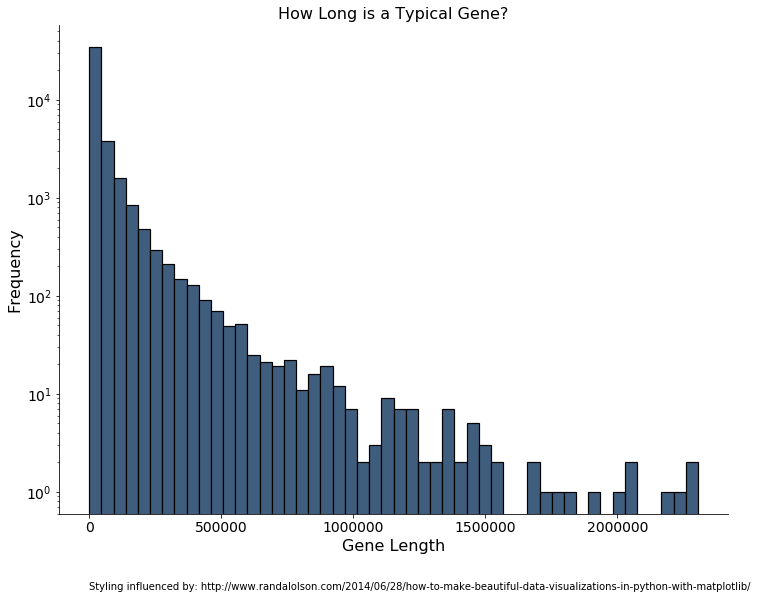

In [356]:
# You typically want your plot to be ~1.33x wider than tall.  
# Common sizes: (10, 7.5) and (12, 9) 
plt.figure(1, figsize=(12, 9))

# Remove the plot frame lines. They are unnecessary chartjunk.  
ax1 = plt.subplot(111)  
ax1.spines["top"].set_visible(False)  
ax1.spines["right"].set_visible(False)  
  
# Ensure that the axis ticks only show up on the bottom and left of the plot.  
# Ticks on the right and top of the plot are generally unnecessary chartjunk.  
ax1.get_xaxis().tick_bottom()  
ax1.get_yaxis().tick_left()  
  
# Make sure your axis ticks are large enough to be easily read.  
# You don't want your viewers squinting to read your plot.  
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)

plt.title("How Long is a Typical Gene?", fontsize=16)
plt.xlabel("Gene Length", fontsize=16)  
plt.ylabel("Count", fontsize=16)

plt.yscale('log')
plt.text(0, 0.1, "Styling influenced by: http://www.randalolson.com/2014/06/28/how-to-make-beautiful-data-visualizations-in-python-with-matplotlib/", fontsize=10)

gene_df['length'].plot(kind='hist', bins=50, ax=ax1, log=True, color='#3F5D7D', edgecolor='black', linewidth=1.2)
plt.show()

### Find the longest genes

In [357]:
# use an index vector to find genes that are longer than 2 million bases
# sort the returned values by length
# .iloc[::-1] reverses the sort to be max to min
gene_df[gene_df['length'] > 2e6].sort_values('length').iloc[::-1]

,seqid,source,type,start,end,score,strand,phase,gene_name,gene_id,gene_description,length
2309345,7,ensembl_havana,gene,146116002,148420998,.,+,.,CNTNAP2,ENSG00000174469,contactin associated protein-like 2 [Source:HG...,2304997
2422510,9,ensembl_havana,gene,8314246,10612723,.,-,.,PTPRD,ENSG00000153707,protein tyrosine phosphatase%2C receptor type ...,2298478
2527169,X,ensembl_havana,gene,31097677,33339441,.,-,.,DMD,ENSG00000198947,dystrophin [Source:HGNC Symbol%3BAcc:HGNC:2928],2241765
440886,11,ensembl_havana,gene,83455012,85627922,.,-,.,DLG2,ENSG00000150672,discs large MAGUK scaffold protein 2 [Source:H...,2172911
2323457,8,ensembl_havana,gene,2935353,4994972,.,-,.,CSMD1,ENSG00000183117,CUB and Sushi multiple domains 1 [Source:HGNC ...,2059620
1569914,20,ensembl_havana,gene,13995369,16053197,.,+,.,MACROD2,ENSG00000172264,MACRO domain containing 2 [Source:HGNC Symbol%...,2057829


### Find the shortest genes

In [358]:
# just short the gene dataframe by length and return the first few values
gene_df.sort_values('length').head()

,seqid,source,type,start,end,score,strand,phase,gene_name,gene_id,gene_description,length
682278,14,havana,gene,22438547,22438554,.,+,.,TRDD1,ENSG00000223997,T cell receptor delta diversity 1 [Source:HGNC...,8
682282,14,havana,gene,22439007,22439015,.,+,.,TRDD2,ENSG00000237235,T cell receptor delta diversity 2 [Source:HGNC...,9
2306836,7,havana,gene,142786213,142786224,.,+,.,TRBD1,ENSG00000282431,T cell receptor beta diversity 1 [Source:HGNC ...,12
682286,14,havana,gene,22449113,22449125,.,+,.,TRDD3,ENSG00000228985,T cell receptor delta diversity 3 [Source:HGNC...,13
1879625,4,havana,gene,10238213,10238235,.,-,.,AC006499.9,ENSG00000271544,,23


## Gene Distribution Among Chromosomes

In [359]:
# list of chromosomes
chromosomes_list = [str(i) for i in range(1, 23)] + ['X', 'Y', 'MT'] # list comprehensions

# filter out unassembled DNA sequences from the gene dataframe
gene_df = gene_df[gene_df['seqid'].isin(chromosomes_list)]

# count the occurences of each chromosome
chromosome_gene_count = gene_df.groupby('seqid').count().iloc[:, 0].sort_values().iloc[::-1]
chromosome_gene_count

seqid
1     3902
2     2806
11    2561
19    2412
17    2280
3     2204
6     2154
12    2140
7     2106
5     2002
16    1881
X     1852
4     1751
9     1659
8     1628
10    1600
15    1476
14    1449
22     996
20     965
13     872
18     766
21     541
Y      436
Name: source, dtype: int64

### Compare gene distribution to chromosome length

In [360]:
# filter out unassembled DNA sequences from the GRCh38 dataframe
gdf = gdf[gdf['seqid'].isin(chromosomes_list)]

# drop unneccesary columns
gdf.drop(['start', 'end', 'score', 'strand', 'phase', 'attributes'], axis=1, inplace=True)

# sort the sub-gene dataframe by lenght
gdf.sort_values('length').iloc[::-1]

,seqid,source,type,length
0,1,GRCh38,chromosome,248956422
1364641,2,GRCh38,chromosome,242193529
1705855,3,GRCh38,chromosome,198295559
1864567,4,GRCh38,chromosome,190214555
1964921,5,GRCh38,chromosome,181538259
2080148,6,GRCh38,chromosome,170805979
2196981,7,GRCh38,chromosome,159345973
2514125,X,GRCh38,chromosome,156040895
2321361,8,GRCh38,chromosome,145138636
2416560,9,GRCh38,chromosome,138394717


In [361]:
# merge the datasets to compare gene_count and chromosome length

# convert a series to a dataframe
gene_count_df = chromosome_gene_count.to_frame(name='gene_count').reset_index()

# merge datasets
merged_df = gdf.merge(gene_count_df, on='seqid')
merged_df

,seqid,source,type,length,gene_count
0,1,GRCh38,chromosome,248956422,3902
1,10,GRCh38,chromosome,133797422,1600
2,11,GRCh38,chromosome,135086622,2561
3,12,GRCh38,chromosome,133275309,2140
4,13,GRCh38,chromosome,114364328,872
5,14,GRCh38,chromosome,107043718,1449
6,15,GRCh38,chromosome,101991189,1476
7,16,GRCh38,chromosome,90338345,1881
8,17,GRCh38,chromosome,83257441,2280
9,18,GRCh38,chromosome,80373285,766


### Plot the gene count compared to chromosome length

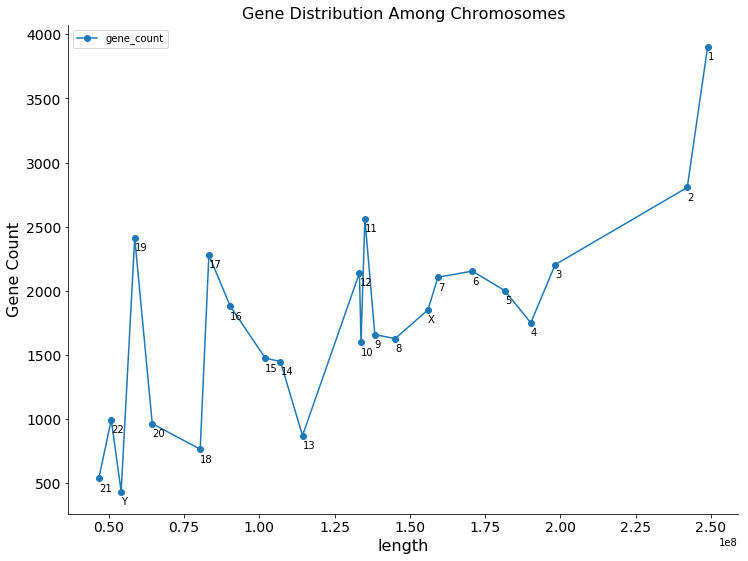

In [362]:
# You typically want your plot to be ~1.33x wider than tall.  
# Common sizes: (10, 7.5) and (12, 9) 
plt.figure(2, figsize=(12, 9))

# Remove the plot frame lines. They are unnecessary chartjunk.  
ax2 = plt.subplot(111)  
ax2.spines["top"].set_visible(False)  
ax2.spines["right"].set_visible(False)  
  
# Ensure that the axis ticks only show up on the bottom and left of the plot.  
# Ticks on the right and top of the plot are generally unnecessary chartjunk.  
ax2.get_xaxis().tick_bottom()  
ax2.get_yaxis().tick_left()  
  
# Make sure your axis ticks are large enough to be easily read.  
# You don't want your viewers squinting to read your plot.  
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)

plt.title("Gene Distribution Among Chromosomes", fontsize=16)
plt.xlabel("Chromosome Length", fontsize=16)  
plt.ylabel("Gene Count", fontsize=16)

merged_df[['length', 'gene_count']].sort_values('length').plot(kind='line', ax=ax2, x='length', y='gene_count', style='o-')

for (s, x, y) in merged_df[['seqid', 'length', 'gene_count']].sort_values('length').values:
    plt.text(x, y - 100, str(s))

plt.show()